### Overview
This project focuses on predicting property prices in various districts of California using several district-level features. By building a predictive model, we aim to identify key variables that influence housing prices and improve the accuracy of house value predictions. The project will specifically utilize simple linear regression and multiple linear regression to address this regression task, ensuring proper data handling and evaluation of the models.


### Problem Statement
The objective is to predict the median house value in California districts based on features such as income, the number of rooms, geographical location, and proximity to the ocean. Given the dataset, we will develop regression models, evaluate their performance, and determine which model provides the best balance between predictive accuracy and interpretability.

Refer to the **Data information.pdf** for more details on variables before importing the data to the notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data Preprocessing

In [3]:
df = df[['median_income', 'median_house_value']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       20640 non-null  float64
 1   median_house_value  20640 non-null  float64
dtypes: float64(2)
memory usage: 322.6 KB


In [5]:
df.head(10)

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
5,4.0368,269700.0
6,3.6591,299200.0
7,3.1200,241400.0
8,2.0804,226700.0
9,3.6912,261100.0


In [6]:
df.columns

Index(['median_income', 'median_house_value'], dtype='object')

In [7]:
df.sample(5)

,median_income,median_house_value
12059,2.2969,116100.0
18320,6.7257,500001.0
9759,2.8775,134100.0
18217,5.9291,284600.0
4851,2.7125,150000.0


In [8]:
df.isna().sum()

median_income         0
median_house_value    0
dtype: int64

In [9]:
df.corr()

,median_income,median_house_value
median_income,1.000000,0.688075
median_house_value,0.688075,1.000000


### Exploratory Data Analysis

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

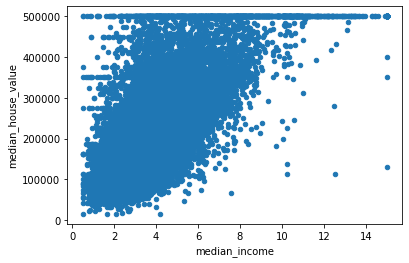

In [10]:
df.plot.scatter('median_income', 'median_house_value')

<AxesSubplot:ylabel='median_house_value'>

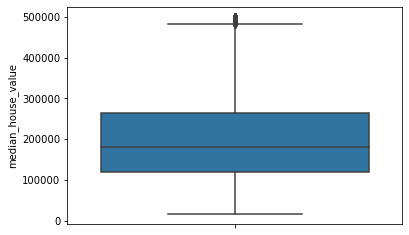

In [11]:
sns.boxplot(y='median_house_value', data=df)

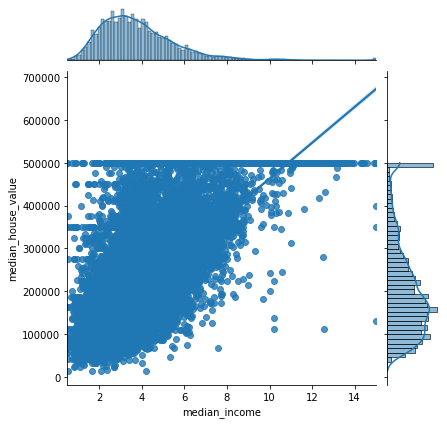

In [13]:
sns.jointplot(x='median_income', y='median_house_value', data=df, kind='reg')

In [14]:
df.drop(df[df['median_house_value']>500000].index, inplace = True)

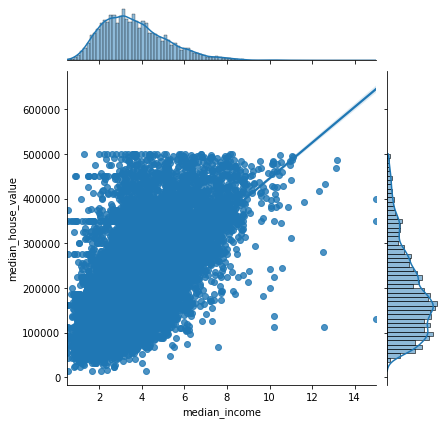

In [16]:
sns.jointplot(x='median_income', y='median_house_value', data=df, kind='reg')

In [17]:
X = df.iloc[:, 0].values.reshape(-1,1)

y = df.iloc[:,1].values

### Model Building

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=False)

In [19]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

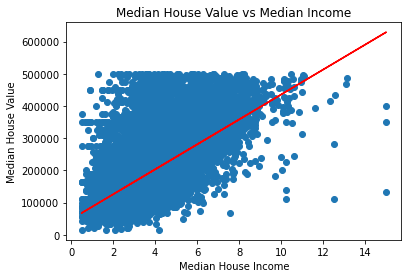

In [20]:
line = lr.coef_*X + lr.intercept_

plt.scatter(X,y)
plt.plot(X, line, 'r')
plt.xlabel('Median House Income')
plt.ylabel('Median House Value')
plt.title('Median House Value vs Median Income')
plt.show()

In [22]:
y_pred = lr.predict(X_test)

new_df = pd.DataFrame({'Actual Values': y_test,
            'Predicted Values': y_pred})

new_df

### Model Evaluation

In [24]:
print('Coefficient: \n', lr.coef_)

print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

print('Coefficient of determination: {:.2f}'.format(r2_score(y_test, y_pred)))

Coefficient: 
 [38702.97233842]
Mean Squared Error: 5831038297.42
Coefficient of determination: 0.44


In [25]:
own_pred = lr.predict([[4.0]])

print('My Target Value is = ', str(own_pred[0]))

My Target Value is =  203016.4237218649
